<a href="https://colab.research.google.com/github/keithferns98/ann/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


In [2]:
print(f'Tensorflow version{tf.__version__}')

Tensorflow version2.6.0


In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
CheckList = ["GPU", "CPU"]
for device in CheckList:
    out_ = tf.config.list_physical_devices(device)    
    if len(out_) > 0:
        print(f"{device} is available")        
        print("details\n",out_)
    else:
        print(f"{device} not available")

GPU is available
details
 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

In [7]:
mnist=tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
print(f'data type of X_train_full: {X_train_full.dtype} and shape {X_train_full.shape} also y_train_full shape is {y_train_full.shape} and y_train_full dtype{y_train_full.dtype}')

data type of X_train_full: uint8 and shape (60000, 28, 28) also y_train_full shape is (60000,) and y_train_full dtypeuint8


In [9]:
len(X_train_full),len(X_test)

(60000, 10000)

In [10]:
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_test=X_test/255.

In [13]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

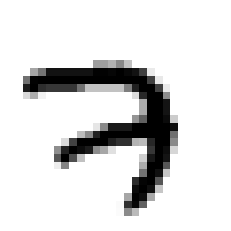

In [14]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

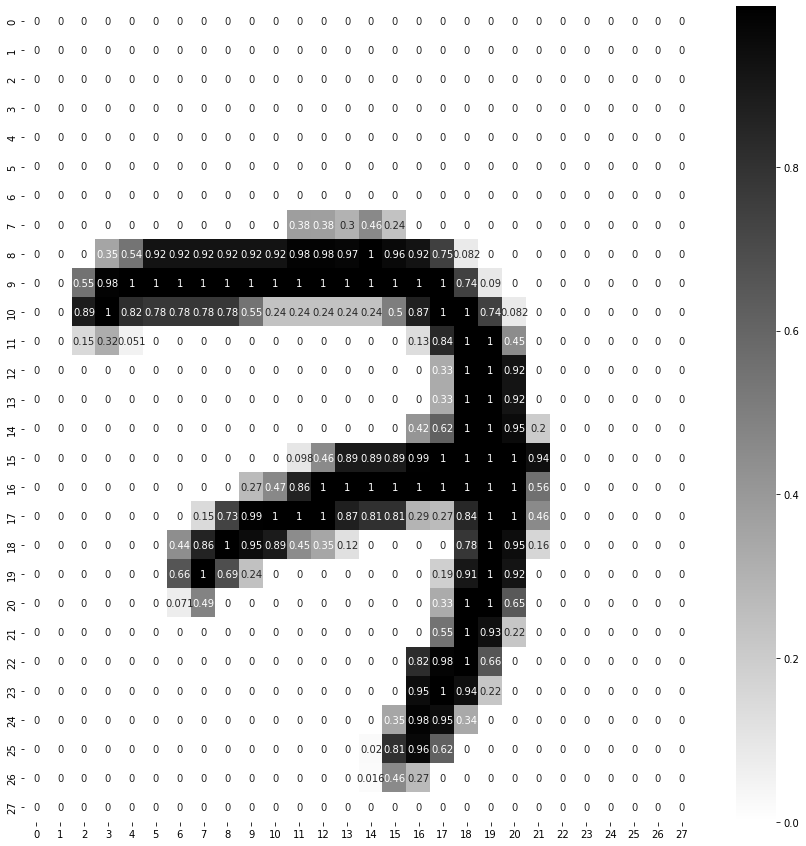

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [16]:
y_train[0]

7

In [17]:
Layers=[tf.keras.layers.Flatten(input_shape=[28,28],name='InputLayer'),
        tf.keras.layers.Dense(300,activation='relu',name='hiddenLayer1'),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenLayer2'),
        tf.keras.layers.Dense(10,activation='softmax',name='OutputLayer')]
model_clf=tf.keras.models.Sequential(Layers)

In [18]:
#Altenative 1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [19]:
#Alternative 2
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [20]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [22]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.6020 - accuracy: 0.8479 - val_loss: 0.2970 - val_accuracy: 0.9146
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2849 - accuracy: 0.9175 - val_loss: 0.2340 - val_accuracy: 0.9348
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2339 - accuracy: 0.9329 - val_loss: 0.2025 - val_accuracy: 0.9452
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2008 - accuracy: 0.9430 - val_loss: 0.1762 - val_accuracy: 0.9512
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1750 - accuracy: 0.9497 - val_loss: 0.1588 - val_accuracy: 0.9544
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1552 - accuracy: 0.9560 - val_loss: 0.1430 - val_accuracy: 0.9604
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1389 - accuracy: 0.9603 - val_loss: 0.1377 - val_accuracy:

In [23]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [24]:
UNIQUE_PATH = model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2021_10_06_16_54_14_.h5


In [25]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [26]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.601999,0.847909,0.297030,0.9146
1,0.284930,0.917455,0.233976,0.9348
2,0.233930,0.932891,0.202462,0.9452
3,0.200823,0.943018,0.176242,0.9512
4,0.174952,0.949673,0.158842,0.9544
5,0.155159,0.956018,0.142973,0.9604
6,0.138850,0.960345,0.137732,0.9630
7,0.125650,0.964091,0.123317,0.9678
8,0.114104,0.967564,0.114453,0.9686
9,0.104315,0.970727,0.109003,0.9700


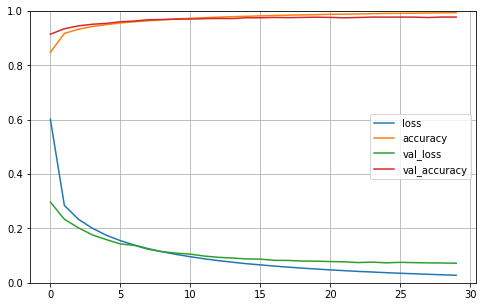

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0700 - accuracy: 0.9788


[0.07002684473991394, 0.9787999987602234]

In [29]:
X_new = X_test[:3]
y_proba = model_clf.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
y_pred=np.argmax(model_clf.predict(X_new),axis=-1)
y_pred

array([7, 2, 1])

In [31]:
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred

array([7, 2, 1])

In [32]:
y_test[0]

7

In [33]:
y_test_now=y_test[:3]

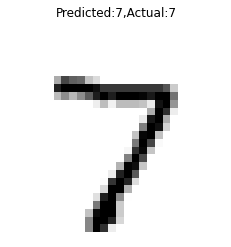

------------------------------------------------------------


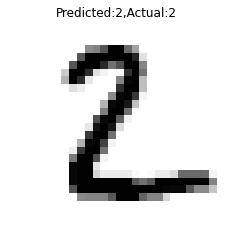

------------------------------------------------------------


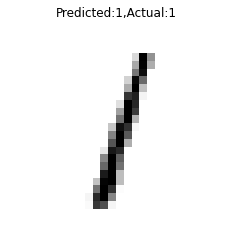

------------------------------------------------------------


In [34]:
for data,pred,actual in zip(X_new,y_pred,y_test_now):
    plt.imshow(data,cmap='binary')
    plt.title(f'Predicted:{pred},Actual:{actual}')
    plt.axis('off')
    plt.show()
    print('---'*20)